In [1]:
import bem.Experiments as Exp
import dlpm.dlpm_experiment as dlpm_exp
from dlpm.NeptuneLogger import NeptuneLogger
import importlib
# importlib.reload(exp_utils)
# importlib.reload(Exp)


config_path = 'dlpm/configs/'
config_file = '2d_data.yml'
checkpoint_dir = 'models/tmp'

# the ExpUtils class specifies how to hash the parameter dict, and what and how to initiliaze methods and models
exp = Exp.Experiment(checkpoint_dir=checkpoint_dir, 
                     p=config_file, 
                     logger = None, 
                     config_path=config_path, 
                     exp_hash= dlpm_exp.exp_hash, 
                     eval_hash=None, # will use default function
                     init_method_by_parameter= dlpm_exp.init_method_by_parameter, 
                     init_models_by_parameter= dlpm_exp.init_models_by_parameter, 
                     reset_models= dlpm_exp.reset_models)

exp.utils.p['run']['epochs'] = 20
exp.utils.p['run']['eval_freq'] = 10
exp.utils.p['run']['checkpoint_freq'] = 10
exp.utils.p['method'] = 'lim'
exp.utils.p['eval']['data_to_generate'] = 1000
exp.utils.p['eval'][exp.utils.p['method']]['reverse_steps'] = 100
exp.prepare()

using device mps


In [2]:
exp.run(progress=False, max_batch_per_epoch=10)

training model to epoch 20 from epoch 0 ...


/opt/homebrew/anaconda3/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


epoch_loss 0.13194072842597962
Done training epoch 1/20
epoch_loss 0.09405360370874405
Done training epoch 2/20
epoch_loss 0.08792206794023513
Done training epoch 3/20
epoch_loss 0.08145129084587097
Done training epoch 4/20
epoch_loss 0.07296008318662643
Done training epoch 5/20
epoch_loss 0.06688587069511413
Done training epoch 6/20
epoch_loss 0.06357248276472091
Done training epoch 7/20
epoch_loss 0.05975924134254455
Done training epoch 8/20
epoch_loss 0.05813933834433556
Done training epoch 9/20
epoch_loss 0.057253191620111464
Done training epoch 10/20
saved ('models/tmp/gmm_grid/model_043201be097ba679_10.pt', 'models/tmp/gmm_grid/parameters_043201be097ba679.pt', 'models/tmp/gmm_grid/eval_043201be097ba679.pt')
evaluating model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 206.55it/s]


wasserstein
wasserstein: 1.5818603818809005
	losses_batch = 0.05720600485801697
	wass = 1.5818603818809005
	mmd = 0.39262932538986206
	precision = 0.5946489265983189
	recall = 0.9527790391532097
	density = 0.0
	coverage = 0.0
	fid = 0.0
	f_1_pr = 0.7322719318216174
	f_1_dc = 0.0
	fig = None


/opt/homebrew/anaconda3/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


epoch_loss 0.05759120881557465
Done training epoch 11/20
epoch_loss 0.057286772131919864
Done training epoch 12/20
epoch_loss 0.05662739276885986
Done training epoch 13/20
epoch_loss 0.05619492903351784
Done training epoch 14/20
epoch_loss 0.05546807870268822
Done training epoch 15/20
epoch_loss 0.0560269296169281
Done training epoch 16/20
epoch_loss 0.05597405731678009
Done training epoch 17/20
epoch_loss 0.05601408034563064
Done training epoch 18/20
epoch_loss 0.055226026475429534
Done training epoch 19/20
epoch_loss 0.054202257096767424
Done training epoch 20/20
saved ('models/tmp/gmm_grid/model_043201be097ba679_20.pt', 'models/tmp/gmm_grid/parameters_043201be097ba679.pt', 'models/tmp/gmm_grid/eval_043201be097ba679.pt')
evaluating model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 239.89it/s]


wasserstein
wasserstein: 1.1181773549117775
	losses_batch = 0.053815100342035294
	wass = 1.1181773549117775
	mmd = 0.1867293417453766
	precision = 0.6131025361955231
	recall = 0.9645364379864395
	density = 0.0
	coverage = 0.0
	fid = 0.0
	f_1_pr = 0.7496768855993987
	f_1_dc = 0.0
	fig = None


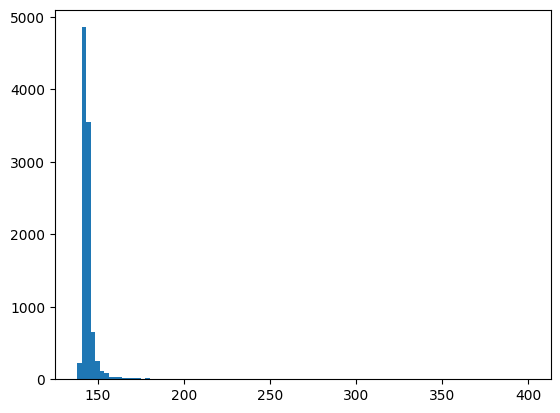

In [29]:
import bem.datasets.Data as Data

data = Data.Generator('sas', 
           alpha = 1.99,  
            a = None, 
            device = None, 
            isotropic = False,
            clamp_eps = None)

tmp = data.generate(size = [10000, 10000])

# plot histogram of the L2 norm of the generated data
import matplotlib.pyplot as plt
import numpy as np
tmp = np.linalg.norm(tmp, axis=1)
# clip the data to avoid outliers
tmp = np.clip(tmp, 0, 400)
plt.hist(tmp, bins=100)
plt.show()
